In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 18})

# 创建一个简单的包含两个频率成分的信号
data_step = 0.001
t = np.arange(start=0, stop=1, step=data_step)
f_clean = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
f_noise = f_clean + 2.5 * np.random.randn(len(t))


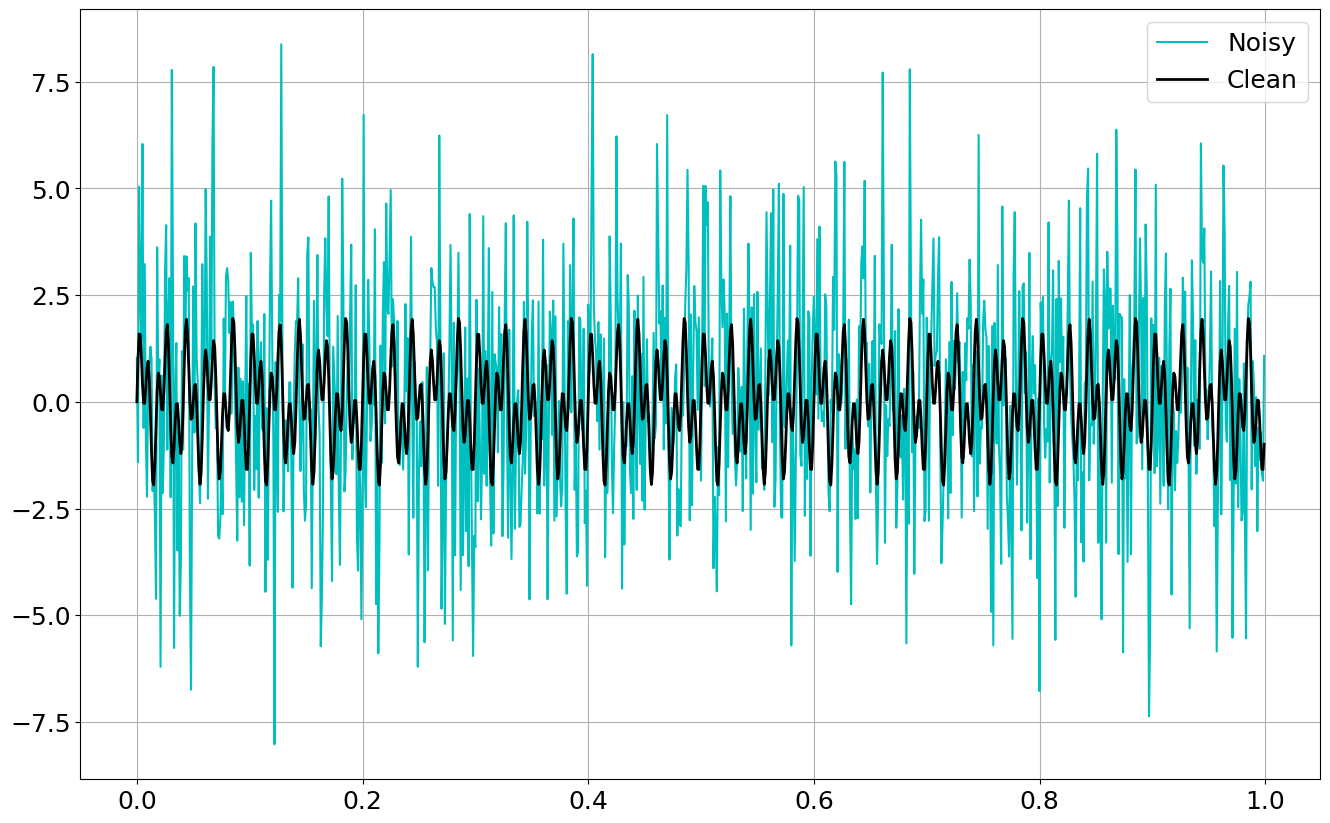

In [3]:

# 绘制图形
plt.plot(t, f_noise, color='c', linewidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', linewidth=2, label='Clean')
plt.legend()
plt.grid(True)
plt.show()

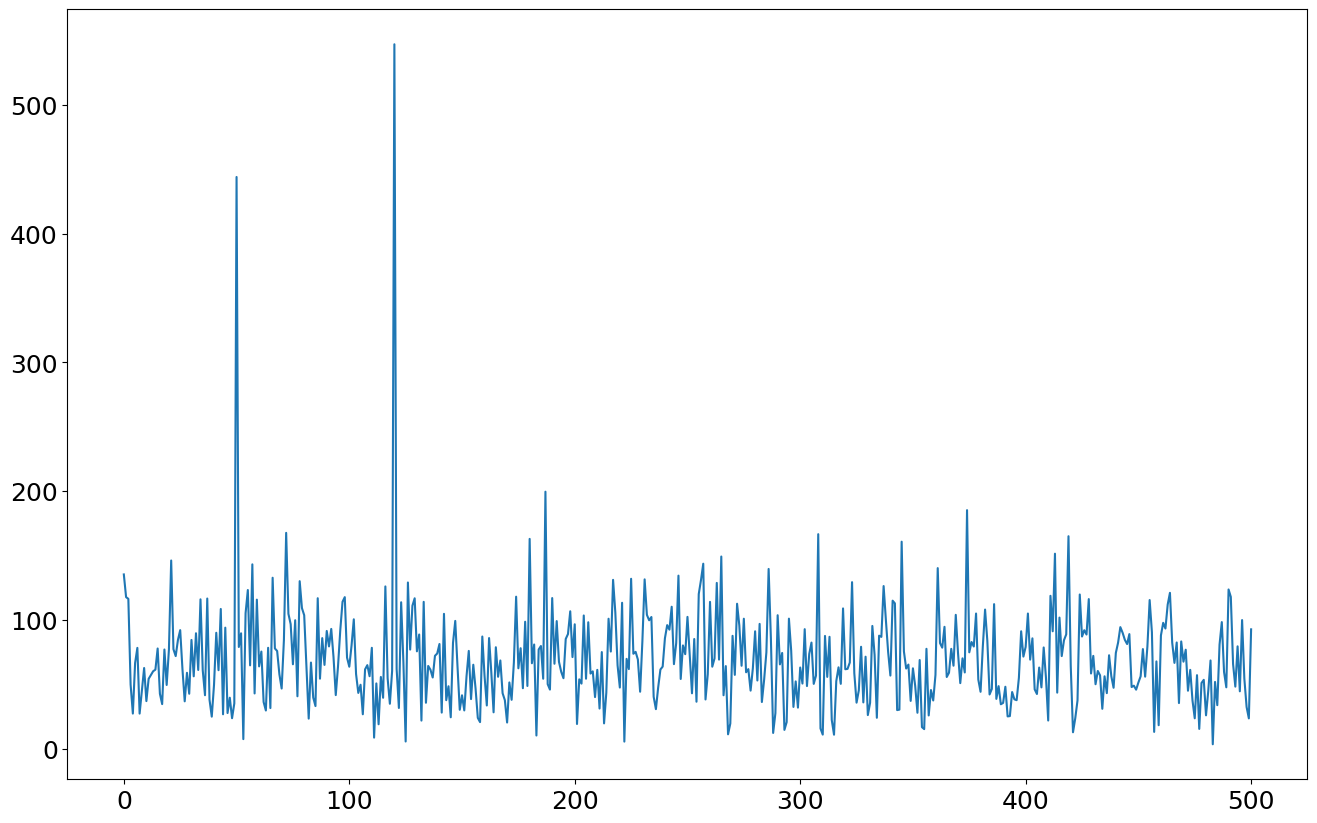

In [4]:
from scipy.fft import rfft,rfftfreq
# rfft：这是 Scipy 库中的一个函数，用于计算 实数输入的快速傅里叶变换（FFT）。
# 对于一个实数信号（f_noise），rfft 可以高效地计算其离散傅里叶变换（DFT）并返回复数结果。
# 它只计算正频率部分的傅里叶变换，因为对于实数信号，负频率部分是对称的，因此可以忽略。
# yf 是变换后的频域信号，是一个复数数组，包含了频域中各个频率成分的幅值和相位信息。
n    = len(t)
yf   = rfft(f_noise)


# 计算与傅里叶变换结果相对应的频率轴（即频率分量的坐标）。
# n：信号的长度，n = len(t)，表示时域信号的样本数。
# data_step：采样间隔，表示两个连续采样点之间的时间间隔。通常是采样频率的倒数，data_step = 1/sample_rate。
# xf 返回一个包含正频率部分的数组，表示每个频率分量对应的频率值（单位是 Hz）。
xf   = rfftfreq(n,data_step)



plt.plot(xf,np.abs(yf))

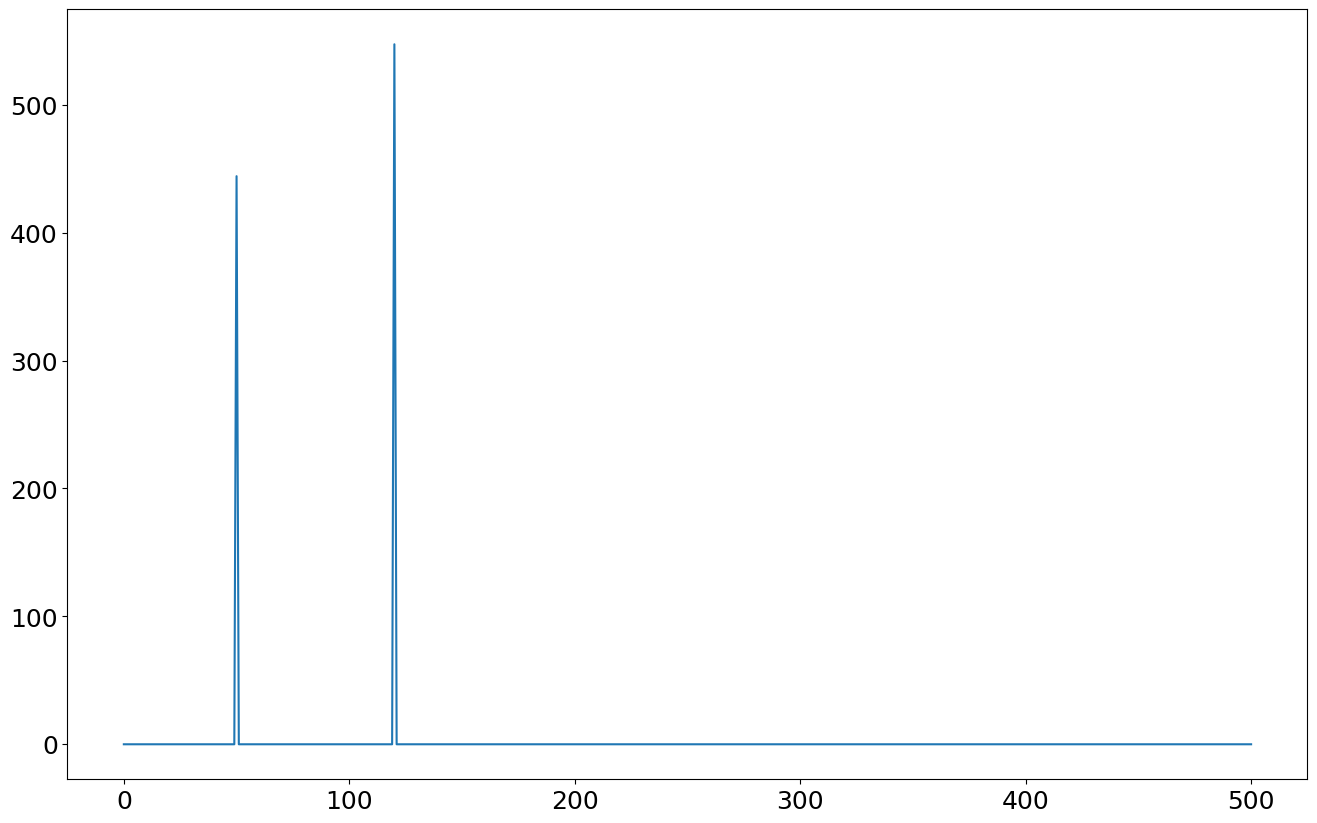

In [5]:
# 去除噪音频率
yf_abs      = np.abs(yf) 
indices     = yf_abs>300   # filter out those value under 300
yf_clean    = indices * yf # noise frequency will be set to 0
plt.plot(xf,np.abs(yf_clean))


(-6.0, 8.0)

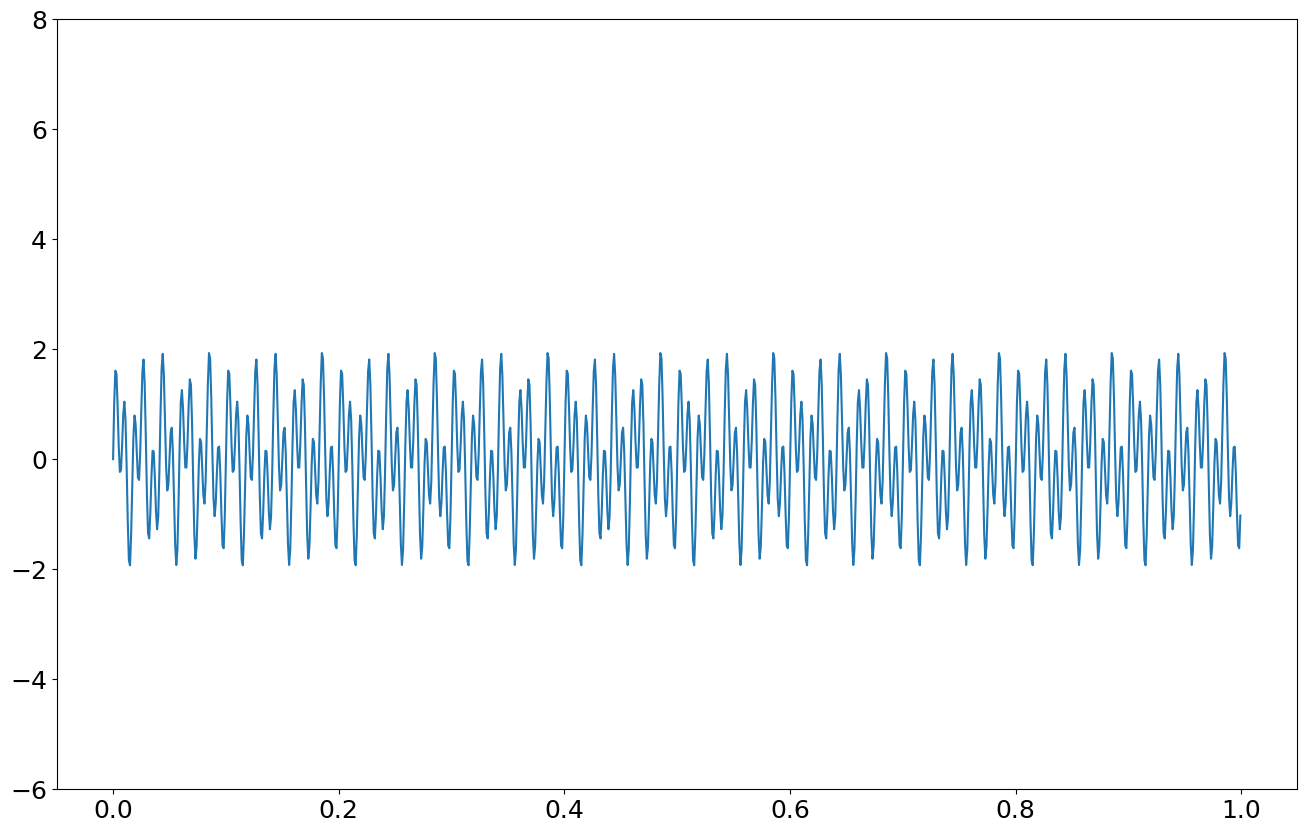

In [6]:
# 将频域转回时域
from scipy.fft import irfft
new_f_clean = irfft(yf_clean)
plt.plot(t,new_f_clean)
plt.ylim(-6,8)
